In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
import glob

# BERT

In [2]:
with open('run-metrics.json', 'r') as f:
    data = json.load(f)
print(data)

{'variance_metrics': {'full_set_var_sum': 0.8285273909568787, 'full_set_var_values': [0.041195183992385864, 0.03737594187259674, 0.03241831436753273, 0.0279122032225132, 0.02042466029524803, 0.019073758274316788, 0.018287625163793564, 0.017793674021959305, 0.01691342331469059, 0.015728650614619255, 0.015252454206347466, 0.014074371196329594, 0.013477472588419914, 0.013031326234340668, 0.01260344311594963, 0.011925622820854187, 0.01183782797306776, 0.011456011794507504, 0.011322693899273872, 0.010873396880924702, 0.010707639157772064, 0.01049008872359991, 0.010153072886168957, 0.009762761183083057, 0.009514139965176582, 0.009414061903953552, 0.009113209322094917, 0.008941298350691795, 0.008719785138964653, 0.008637131191790104, 0.008390272036194801, 0.008241375908255577, 0.008110051043331623, 0.008007076568901539, 0.007913310080766678, 0.007732263766229153, 0.0076059442944824696, 0.007453422527760267, 0.007354367524385452, 0.007251568138599396, 0.007088539656251669, 0.006956500466912985

In [3]:
variance_metrics = data['variance_metrics']
modelling_metrics = data['modelling_metrics']
subset_sizes = modelling_metrics['subset_size']

In [4]:
def get_key(filename):
    return filename.split('/')[2].split('-')[2].split('.')[0].lower()

In [5]:
file_list = glob.glob('./Eval-Results-bert-base-uncased/*')

odd_results = {}
for file in file_list:
    key = get_key(file)
    with open(file, 'r') as f:
        data = f.read()
        odd_results[key] = data
        # process the data as needed


In [6]:
results = {}

In [7]:
results['subset_size'] = subset_sizes
results['r2_value'] = variance_metrics['r2_values']
results['test_accuracy'] = modelling_metrics['test_accuracies']
results['test_loss'] = modelling_metrics['test_losses']

In [8]:
subset_sizes = modelling_metrics['subset_size']

for key, values in odd_results.items():
    values = json.loads(values)
    metrics = values['evaluation_metrics']
    losses = []
    accuracies = []
    for metric in metrics:
        loss = metric['eval_loss']
        acc = metric['eval_accuracy']
        losses.append(loss)
        accuracies.append(acc)

    results[f"{key}_loss"] = losses
    results[f"{key}_accuracy"] = accuracies

In [9]:
results_df = pd.DataFrame(results)
results_df

,subset_size,r2_value,test_accuracy,test_loss,reddit_loss,reddit_accuracy,twitter_rd_loss,twitter_rd_accuracy,fin_sent_loss,fin_sent_accuracy,kindle_loss,kindle_accuracy,rottent_tomatoes_loss,rottent_tomatoes_accuracy,imdb_loss,imdb_accuracy,sst2_loss,sst2_accuracy,yelp_loss,yelp_accuracy
0,2776,0.819424,0.748814,0.530179,0.609208,0.661924,0.588827,0.682158,0.540978,0.705752,0.499629,0.786917,0.640234,0.674484,0.558215,0.76280,0.590968,0.688073,0.533143,0.767263
1,5552,0.824859,0.753961,0.491525,0.644386,0.642759,0.603184,0.676701,0.532295,0.736726,0.456622,0.792417,0.581839,0.711069,0.508493,0.75984,0.501182,0.751147,0.439562,0.814158
2,8328,0.826377,0.738521,0.505057,0.603025,0.673995,0.577708,0.692719,0.505479,0.739307,0.486475,0.779917,0.622455,0.670732,0.540863,0.73876,0.560095,0.722477,0.473140,0.796816
3,11104,0.827293,0.767181,0.480362,0.641997,0.688223,0.607393,0.703669,0.733389,0.711652,0.447665,0.787417,0.671295,0.638837,0.504741,0.76708,0.589564,0.681193,0.484313,0.761105
4,13880,0.827823,0.774952,0.461300,0.684103,0.622641,0.626357,0.662986,0.504725,0.756268,0.460479,0.785417,0.592173,0.683865,0.508691,0.75964,0.525159,0.740826,0.451435,0.807211
5,16656,0.828073,0.766374,0.478801,0.669127,0.651222,0.628472,0.669927,0.591323,0.744469,0.463438,0.773583,0.623341,0.686679,0.505737,0.74960,0.532926,0.722477,0.446351,0.806658
6,19432,0.828513,0.768191,0.500919,0.690227,0.665574,0.629990,0.703577,0.724727,0.737832,0.446971,0.797083,0.649299,0.684803,0.502710,0.76548,0.541040,0.719037,0.489513,0.775395
7,22208,0.828446,0.760420,0.485510,0.755358,0.618161,0.680238,0.645650,0.483883,0.774336,0.488761,0.758167,0.578804,0.712008,0.508140,0.74576,0.486603,0.758028,0.412235,0.825974
8,24984,0.828664,0.766778,0.468755,0.721407,0.596922,0.648326,0.637558,0.451922,0.775074,0.522342,0.731667,0.574997,0.700750,0.548609,0.71060,0.499530,0.761468,0.428340,0.816026
9,27760,0.828785,0.764154,0.483793,0.687463,0.653752,0.633793,0.679374,0.544925,0.743732,0.474635,0.776167,0.683443,0.646341,0.520423,0.74580,0.616374,0.676606,0.484255,0.772737


In [10]:
results_df['mean_odd_accuracy'] = results_df[['sst2_accuracy', 'imdb_accuracy', 'yelp_accuracy', 'kindle_accuracy', 'twitter_rd_accuracy', 'rottent_tomatoes_accuracy', 'reddit_accuracy', 'fin_sent_accuracy']].mean(axis=1)
results_df['mean_odd_loss'] = results_df[['sst2_loss', 'imdb_loss', 'yelp_loss', 'kindle_loss', 'twitter_rd_loss', 'rottent_tomatoes_loss', 'reddit_loss', 'fin_sent_loss']].mean(axis=1)
results_df

,subset_size,r2_value,test_accuracy,test_loss,reddit_loss,reddit_accuracy,twitter_rd_loss,twitter_rd_accuracy,fin_sent_loss,fin_sent_accuracy,...,rottent_tomatoes_loss,rottent_tomatoes_accuracy,imdb_loss,imdb_accuracy,sst2_loss,sst2_accuracy,yelp_loss,yelp_accuracy,mean_odd_accuracy,mean_odd_loss
0,2776,0.819424,0.748814,0.530179,0.609208,0.661924,0.588827,0.682158,0.540978,0.705752,...,0.640234,0.674484,0.558215,0.76280,0.590968,0.688073,0.533143,0.767263,0.716171,0.570150
1,5552,0.824859,0.753961,0.491525,0.644386,0.642759,0.603184,0.676701,0.532295,0.736726,...,0.581839,0.711069,0.508493,0.75984,0.501182,0.751147,0.439562,0.814158,0.735602,0.533445
2,8328,0.826377,0.738521,0.505057,0.603025,0.673995,0.577708,0.692719,0.505479,0.739307,...,0.622455,0.670732,0.540863,0.73876,0.560095,0.722477,0.473140,0.796816,0.726840,0.546155
3,11104,0.827293,0.767181,0.480362,0.641997,0.688223,0.607393,0.703669,0.733389,0.711652,...,0.671295,0.638837,0.504741,0.76708,0.589564,0.681193,0.484313,0.761105,0.717397,0.585044
4,13880,0.827823,0.774952,0.461300,0.684103,0.622641,0.626357,0.662986,0.504725,0.756268,...,0.592173,0.683865,0.508691,0.75964,0.525159,0.740826,0.451435,0.807211,0.727357,0.544140
5,16656,0.828073,0.766374,0.478801,0.669127,0.651222,0.628472,0.669927,0.591323,0.744469,...,0.623341,0.686679,0.505737,0.74960,0.532926,0.722477,0.446351,0.806658,0.725577,0.557589
6,19432,0.828513,0.768191,0.500919,0.690227,0.665574,0.629990,0.703577,0.724727,0.737832,...,0.649299,0.684803,0.502710,0.76548,0.541040,0.719037,0.489513,0.775395,0.731098,0.584310
7,22208,0.828446,0.760420,0.485510,0.755358,0.618161,0.680238,0.645650,0.483883,0.774336,...,0.578804,0.712008,0.508140,0.74576,0.486603,0.758028,0.412235,0.825974,0.729760,0.549253
8,24984,0.828664,0.766778,0.468755,0.721407,0.596922,0.648326,0.637558,0.451922,0.775074,...,0.574997,0.700750,0.548609,0.71060,0.499530,0.761468,0.428340,0.816026,0.716258,0.549434
9,27760,0.828785,0.764154,0.483793,0.687463,0.653752,0.633793,0.679374,0.544925,0.743732,...,0.683443,0.646341,0.520423,0.74580,0.616374,0.676606,0.484255,0.772737,0.711814,0.580664


[(0.7, 0.8)]

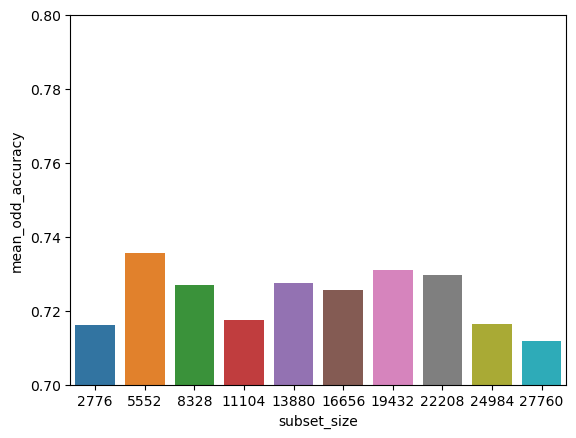

In [11]:
plot = sns.barplot(x=results_df['subset_size'], y=results_df['mean_odd_accuracy'])
plot.set(ylim=(0.7, 0.8))

[(0.4, 0.6)]

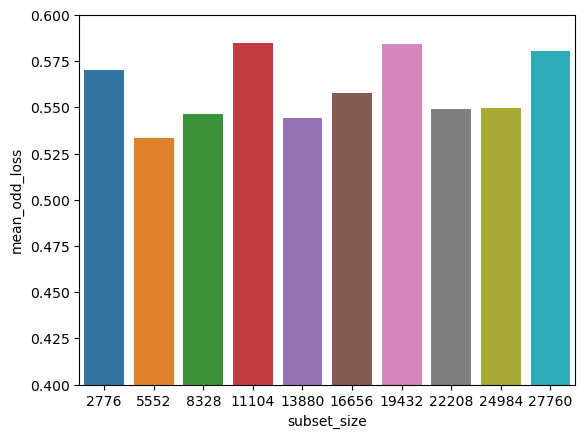

In [12]:
plot = sns.barplot(x=results_df['subset_size'], y=results_df['mean_odd_loss'])
plot.set(ylim=(0.4, 0.6))

[(0.4, 0.8)]

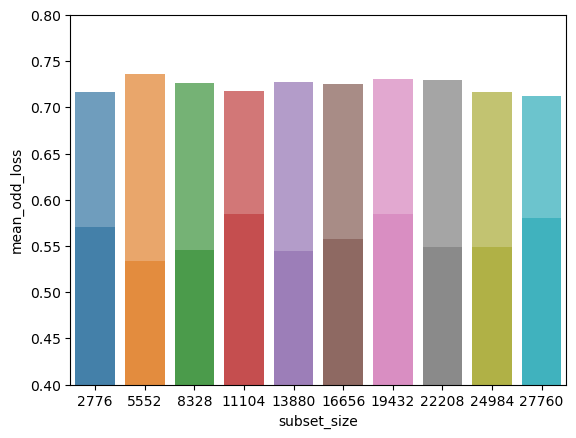

In [13]:
plot = sns.barplot(x=results_df['subset_size'], y=results_df['mean_odd_accuracy'], alpha=0.7)
plot = sns.barplot(x=results_df['subset_size'], y=results_df['mean_odd_loss'], alpha=0.7)
plot.set(ylim=(0.4, 0.8))

[(0.4, 0.8)]

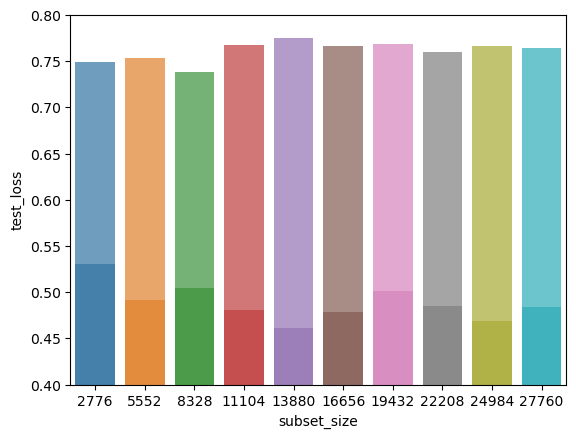

In [14]:
plot = sns.barplot(x=results_df['subset_size'], y=results_df['test_accuracy'], alpha=0.7)
plot = sns.barplot(x=results_df['subset_size'], y=results_df['test_loss'], alpha=0.7)
plot.set(ylim=(0.4, 0.8))

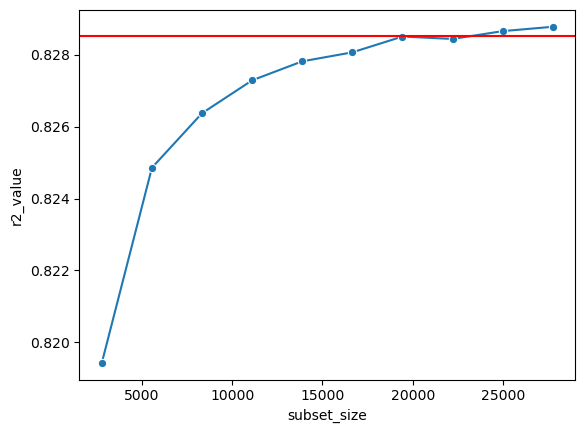

In [15]:
graph = sns.lineplot(x=results_df['subset_size'], y=results_df['r2_value'], marker="o")
graph.axhline(variance_metrics['full_set_var_sum'], color='red')

(0.4, 0.8)

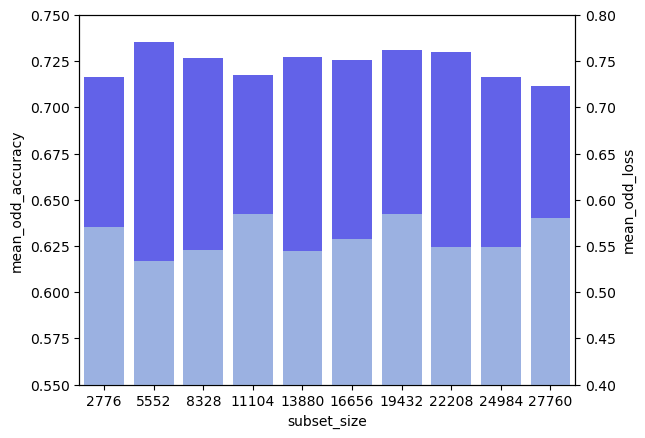

In [19]:
plot = sns.barplot(x=results_df['subset_size'], y=results_df['mean_odd_accuracy'], alpha=0.7, color='blue')
plot.set_ylim(0.55, 0.75)
ax2 = plt.twinx()
plot = sns.barplot(x=results_df['subset_size'], y=results_df['mean_odd_loss'], alpha=0.7, color='lightblue', ax=ax2)
ax2.set_ylim(0.4, 0.8)

(0.4, 0.9)

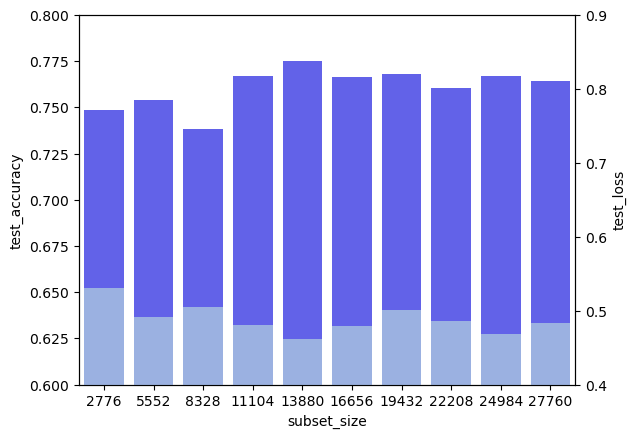

In [21]:
plot = sns.barplot(x=results_df['subset_size'], y=results_df['test_accuracy'], alpha=0.7, color='blue')
plot.set_ylim(0.6, 0.8)
ax2 = plt.twinx()
plot = sns.barplot(x=results_df['subset_size'], y=results_df['test_loss'], alpha=0.7, color='lightblue', ax=ax2)
ax2.set_ylim(0.4, 0.9)

In [22]:
results_df.to_csv('../analysis_results/tweet_eval_bert.csv', index=False)